# Text mining

In [587]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from collections import Counter
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [588]:
data = pd.read_excel('/content/reviews.xlsx')

In [589]:
data

,Text,Class
0,المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...,1
1,المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الر...,1
2,سناكاته زاكية سعره سعر السوق ..احلى ما في المو...,1
3,"بهارات البروستد كتير مميزة ومش ناقصها اشي , وا...",1
4,هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...,0
...,...,...
2495,المطعم مرتب و حلو ، الاكل فيه بشهي وهاي اول مر...,1
2496,يستحق التجربة فاالمنتجات التي يقدمها المطعم عا...,1
2497,مكان المطعم طبعا بما انه بالرابيه فأكيد مزدحم ...,1
2498,المطعم رااائع كوني كنت متخوفه لاني اول مرة راح...,1


In [590]:
data.shape

(2500, 2)

In [591]:
data.isnull().sum()

Text     0
Class    0
dtype: int64

In [592]:
#checking duplicates
data.drop_duplicates(inplace=True)

In [593]:
data.shape

(2481, 2)

In [594]:
data['Class'].value_counts()

1    1884
2     347
0     250
Name: Class, dtype: int64

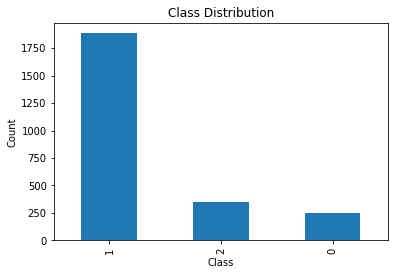

In [595]:
# Making bar plots to check Class distributions 
data['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.show()

### Remove punctuations

In [596]:
import pandas as pd
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation + "؛؟،")
    return text.translate(translator)

text_before = data["Text"].copy()
data["Text"] = data["Text"].apply(remove_punctuation)
text_after = data["Text"]

for i in range(len(data)):
    print("Before: ", text_before.iloc[i])
    print("After: ", text_after.iloc[i], end="\n\n")


Streaming output truncated to the last 5000 lines.
After:  بصراحة مطعم رائع ونضيف جدا انا شخصيا جربت عندهم البروستد وكان بشهي 

Before:  مطعم ممتاز تقريبا كل فترة بروح عليه و بجرب أنا و عائلتي وجبة المشاوي سعرها مناسب و مشبعة بنصح فيه 
After:  مطعم ممتاز تقريبا كل فترة بروح عليه و بجرب أنا و عائلتي وجبة المشاوي سعرها مناسب و مشبعة بنصح فيه 

Before:  مطعم قعدتو كويسه واكلو زاكي بس الارجيله تعيسه. 
After:  مطعم قعدتو كويسه واكلو زاكي بس الارجيله تعيسه 

Before:  ممتاز لكن مكتظ جدا، جرى تحديث له وربما حل هذه المشكله، خيار ممتاز لمحبي اللحوم المشويه. 
After:  ممتاز لكن مكتظ جدا جرى تحديث له وربما حل هذه المشكله خيار ممتاز لمحبي اللحوم المشويه 

Before:  ممتاز اكلو... وسعرو شوي غالي . بس مشكلتو ما فيه قعدة كفاية للزبائن .. وما فيه تواليت 
After:  ممتاز اكلو وسعرو شوي غالي  بس مشكلتو ما فيه قعدة كفاية للزبائن  وما فيه تواليت 

Before:  مطعم جميل جداً وأكله لذيذ بالنسبة للخدمه ممتازة جداً 
After:  مطعم جميل جداً وأكله لذيذ بالنسبة للخدمه ممتازة جداً 

Before:  استريت سانويتش خضار كان طيب, وا

###Tokenization

In [597]:
data['tokenize'] = data['Text'].apply(word_tokenize)
data.head()

,Text,Class,tokenize
0,المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...,1,"[المكان, كتيير, حلو, اكله, الحمدلله, منيح, عاد..."
1,المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الر...,1,"[المطعم, زرته, ﻷول, مرة, مبارح, على, بوفيه, ال..."
2,سناكاته زاكية سعره سعر السوق احلى ما في الموضو...,1,"[سناكاته, زاكية, سعره, سعر, السوق, احلى, ما, ف..."
3,بهارات البروستد كتير مميزة ومش ناقصها اشي وال...,1,"[بهارات, البروستد, كتير, مميزة, ومش, ناقصها, ا..."
4,هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...,0,"[هاد, الفرع, مش, تابع, لشاورما, الريم, الاصلي,..."


###Removing stopwords

In [598]:
#Remove stop words
stop_words = set(stopwords.words('arabic'))
data['stop_words_removed'] = data['tokenize'].apply(lambda x: " ".join(i for i in x if i not in stop_words))

data.head(10)

#notice the results in 6 and 9 instances

,Text,Class,tokenize,stop_words_removed
0,المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...,1,"[المكان, كتيير, حلو, اكله, الحمدلله, منيح, عاد...",المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...
1,المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الر...,1,"[المطعم, زرته, ﻷول, مرة, مبارح, على, بوفيه, ال...",المطعم زرته ﻷول مرة مبارح بوفيه الفطور الرمضان...
2,سناكاته زاكية سعره سعر السوق احلى ما في الموضو...,1,"[سناكاته, زاكية, سعره, سعر, السوق, احلى, ما, ف...",سناكاته زاكية سعره سعر السوق احلى الموضوع انه ...
3,بهارات البروستد كتير مميزة ومش ناقصها اشي وال...,1,"[بهارات, البروستد, كتير, مميزة, ومش, ناقصها, ا...",بهارات البروستد كتير مميزة ومش ناقصها اشي والا...
4,هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...,0,"[هاد, الفرع, مش, تابع, لشاورما, الريم, الاصلي,...",هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...
5,الخدمة ممتازة بس الاكل بارد ومو زاكي ابدا,0,"[الخدمة, ممتازة, بس, الاكل, بارد, ومو, زاكي, ا...",الخدمة ممتازة الاكل بارد ومو زاكي ابدا
6,بدك توكل بيتزا زاكية وتحس انك بتوكل اشي من الب...,1,"[بدك, توكل, بيتزا, زاكية, وتحس, انك, بتوكل, اش...",بدك توكل بيتزا زاكية وتحس انك بتوكل اشي البيت ...
7,مرههههههههههههههههه روعه واكله كلش طيب,1,"[مرههههههههههههههههه, روعه, واكله, كلش, طيب]",مرههههههههههههههههه روعه واكله كلش طيب
8,صراحه احنا منشتري منع مرتين فالاسبوع من هاد ال...,1,"[صراحه, احنا, منشتري, منع, مرتين, فالاسبوع, من...",صراحه احنا منشتري منع مرتين فالاسبوع هاد الفرع...
9,اعتقد انه افضل مطعم فول وفلافل في عمان خصوصا ا...,1,"[اعتقد, انه, افضل, مطعم, فول, وفلافل, في, عمان...",اعتقد انه افضل مطعم فول وفلافل عمان خصوصا الفل...


###Stemming

In [599]:
import nltk
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords

arabic_stemmer = ISRIStemmer() 
def stem_word(word):
  return arabic_stemmer.stem(word)
data['stemming'] = data['stop_words_removed'].apply(lambda x: " ".join([stem_word(word) for word in x.split()]))

data.head()

,Text,Class,tokenize,stop_words_removed,stemming
0,المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...,1,"[المكان, كتيير, حلو, اكله, الحمدلله, منيح, عاد...",المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...,كان كتيير حلو اكل حمدلل نيح عدي وفي اشا كانت طيب
1,المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الر...,1,"[المطعم, زرته, ﻷول, مرة, مبارح, على, بوفيه, ال...",المطعم زرته ﻷول مرة مبارح بوفيه الفطور الرمضان...,طعم زرت ﻷول مرة برح بوف فطر رمض كان نظف جدا رت...
2,سناكاته زاكية سعره سعر السوق احلى ما في الموضو...,1,"[سناكاته, زاكية, سعره, سعر, السوق, احلى, ما, ف...",سناكاته زاكية سعره سعر السوق احلى الموضوع انه ...,سنك زكي سعر سعر سوق حلى وضع انه خدم وصل
3,بهارات البروستد كتير مميزة ومش ناقصها اشي وال...,1,"[بهارات, البروستد, كتير, مميزة, ومش, ناقصها, ا...",بهارات البروستد كتير مميزة ومش ناقصها اشي والا...,بهر روستد كتر ميز ومش نقص اشي اكل ستي نيح بهر ...
4,هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...,0,"[هاد, الفرع, مش, تابع, لشاورما, الريم, الاصلي,...",هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...,هاد فرع مش تبع شور ريم اصل فرع شور ريم عرف جبل...


###Applying Count vectorizer && TF-IDF

In [600]:
text_list = data['stemming'].tolist()

In [601]:
counter = Counter(data['Class'].tolist())
counter 
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common())}

data[data['Class'].map(lambda x: x in top_10_varieties)]

varietal_list = [top_10_varieties[i] for i in data['Class'].tolist()]

varietal_list = np.array(varietal_list)

varietal_list

array([0, 0, 0, ..., 0, 0, 2])

In [602]:
#CountVectorizer
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(text_list)

# TF-IDF
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

###Splitting the data

In [603]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)


random_os = RandomOverSampler(random_state=42)
X_train_res, y_train_res = random_os.fit_resample(X_train, y_train)

###Naive Bayes Model

In [604]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_res, y_train_res)
y_score = clf.predict(X_test)

In [605]:
n_right = 0
for i in range(len(y_score)):
    if y_score[i] == y_test[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test)) * 100)))

Accuracy: 81.34%


### Random forest

In [609]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf.fit(X_train_new, y_train_new)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9543624161073826
